### Download Libaray

In [1]:
# Watermark: IPython magic extension for printing date and time stamps, version numbers, and hardware information
!pip install -q -U watermark
# Transformer: State-of-the-art Natural Language Processing for PyTorch and TensorFlow 2.0
# !pip install transformers==2.11.0

# Print out key libraries' versions 
%reload_ext watermark
%watermark -v -p numpy,pandas,torch,transformers

# columnize: Format a simple (i.e., not nested) list into aligned columns
# !pip install columnize

!pip install emoji --upgrade
!pip install seaborn

CPython 3.7.7
IPython 7.16.1

numpy 1.18.5
pandas 1.0.5
torch 1.4.0
transformers not installed
Requirement already up-to-date: emoji in /anaconda/envs/py37_default/lib/python3.7/site-packages (0.6.0)


In [2]:
# Keras is an open-source library that provides a Python interface for artificial neural networks.
# Keras acts as an interface for the TensorFlow library.
!pip install keras
!pip install tensorflow
!pip install tensorflow-gpu

### Import Library

In [3]:
import os
# util library
import ast
import emoji 
import random

from nltk.tokenize.casual import TweetTokenizer

# ML/NLP/NLU library
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Data Analytics library
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv

# Visualization library
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams

### Common Setup

In [4]:
# GCU
import keras
import tensorflow as tf

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

tf.config.experimental.list_physical_devices('GPU')

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6740622605830557596
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 17690226328170764067
physical_device_desc: "device: XLA_CPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 10944230208
locality {
  bus_id: 1
  links {
  }
}
incarnation: 4320747439101452712
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 1d38:00:00.0, compute capability: 3.7"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 17522567573156284706
physical_device_desc: "device: XLA_GPU device"
]


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
# tf.debugging.set_log_device_placement(True)

# a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
# b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
# c = tf.matmul(a, b)

# tf.debugging.set_log_device_placement(False)

In [6]:
# Visualization Config 
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 12, 10

# PyTorch Config 
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
# torch.manual_seed(RANDOM_SEED)

# Pandas Config
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [7]:
DATA_DIR = './data'
print(os.listdir(DATA_DIR))

['glove.6B.100d.txt', 'glove.6B.200d.txt', 'tweet_emoji_train_800000.csv', 'glove.6B.50d.txt', 'glove.6B.300d.txt']


### Exploratory Data Analysis

In [8]:
df = pd.read_csv(os.path.join(DATA_DIR, 'tweet_emoji_train_800000.csv'))
# df = df.head(10000)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      800000 non-null  int64 
 1   tweet   799971 non-null  object
 2   emoji   800000 non-null  object
dtypes: int64(1), object(2)
memory usage: 18.3+ MB


,id,tweet,emoji
0,0,CeeC is going to be another Tboss What is 45 million Naira,{'face_with_tears_of_joy'}
1,1,This gif kills me Death is literally gushing towards you and you really gon do a whole 3point turn,{'weary_face'}
2,2,LOVE TEST Raw Real JaDine,{'purple_heart'}
3,3,i swear we dont gotta look it finds us,{'face_with_tears_of_joy'}
4,4,We would like to wish everyone a very Happy New Year and all the best in 2018,{'party_popper'}


In [9]:
# Drop id column
df = df.drop('id', 1) 
# Drop duplicated tweet (for example: thank you)
df = df.drop_duplicates(subset=['tweet'], keep=False) 
df.info()
# Drop any sample with null attribute
df = df.dropna(how='any',axis=0)  
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532907 entries, 0 to 799997
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   tweet   532907 non-null  object
 1   emoji   532907 non-null  object
dtypes: object(2)
memory usage: 12.2+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 532907 entries, 0 to 799997
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   tweet   532907 non-null  object
 1   emoji   532907 non-null  object
dtypes: object(2)
memory usage: 12.2+ MB


,tweet,emoji
0,CeeC is going to be another Tboss What is 45 million Naira,{'face_with_tears_of_joy'}
2,LOVE TEST Raw Real JaDine,{'purple_heart'}
4,We would like to wish everyone a very Happy New Year and all the best in 2018,{'party_popper'}
6,just know ilysm k bye friend,{'purple_heart'}
7,Too glam to give a damn,{'sparkles'}


In [10]:
# Convert column "emoji" to "set", so duplicated emoji will be removed 
df['emoji'] = df['emoji'].apply(lambda x: set(ast.literal_eval(x))) 
# Then convert column "emoji" to "list", so it is hashable 
df.emoji= df.emoji.apply(list)
# Peek the head and see if dataframe transformation is working as expected 
df.head(10)

,tweet,emoji
0,CeeC is going to be another Tboss What is 45 million Naira,[face_with_tears_of_joy]
2,LOVE TEST Raw Real JaDine,[purple_heart]
4,We would like to wish everyone a very Happy New Year and all the best in 2018,[party_popper]
6,just know ilysm k bye friend,[purple_heart]
7,Too glam to give a damn,[sparkles]
8,fuck that sicko,[clapping_hands]
12,theyre 14 so i mean,"[person_shrugging, female_sign]"
13,Your artist got a dope sound my boy runs DM them this song for a post,[fire]
14,mannn sometimes we gotta take one to the face,"[face_with_tears_of_joy, person_facepalming, male_sign]"
15,Awwee you got it,"[red_heart, loudly_crying_face]"


In [11]:
# helper functions to get the distinct emoji in the dataset
def get_distinct_emoji(emoji_column:pd.core.series.Series)->set:
    emoji_set = set()
    for emojis in emoji_column:
        for x in emojis: 
            emoji_set.add(x)
    return emoji_set

def format_emoji(e):
    return emoji.emojize(':'+ e +':')

def print_distinct_emoji_in_dataset(emoji_set:list, displaywidth=10):
    print('Total distinct count of Emojis in dataset is : {}'.format(len(emoji_set)))
    emoji_set_formatted = [format_emoji(e) for e in emoji_set]
    display = ''
    for i, e in enumerate(emoji_set_formatted):
        display += e + ' '
        if (i + 1) % displaywidth == 0:
            display = display + '\n'
    print(display)

# Gets the distinct emoji from dataset to be used for building the emoji multiclass classifier 
emoji_class = get_distinct_emoji(df.emoji)
print_distinct_emoji_in_dataset(sorted(list(emoji_class)))

Total distinct count of Emojis in dataset is : 49
👌 👇 👉 😁 💙 👏 💥 😢 ‼ 👀 
😘 🙄 😂 ♀ 🔥 💪 😳 🙏 🌟 ♥ 
✔ 💯 😭 ♂ 🎉 🤦 🤷 🚨 💜 🙌 
❤ ➡ 🤣 💀 ☺ 😍 😊 😎 ✨ 💖 
🗣 🤔 👍 🏆 💕 😩 ✅ 😉 💛 


In [12]:
# Since most of the tweets in the dataset only contain one emoji, we will build a multiclass classifier
# instead of building a multilable classifier 

# So, we will build a multiclass dataset with tweets which only contain one emoji 
df_multiclass_dataset = df[df['emoji'].apply(lambda x: len(x)==1)].copy()
# Create a column "label", to save the emoji info for each tweet in the dataset
df_multiclass_dataset['label'] = df_multiclass_dataset['emoji'].apply(lambda x: x[0])
df_multiclass_dataset.head()
df_multiclass_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 462806 entries, 0 to 799997
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   tweet   462806 non-null  object
 1   emoji   462806 non-null  object
 2   label   462806 non-null  object
dtypes: object(3)
memory usage: 14.1+ MB


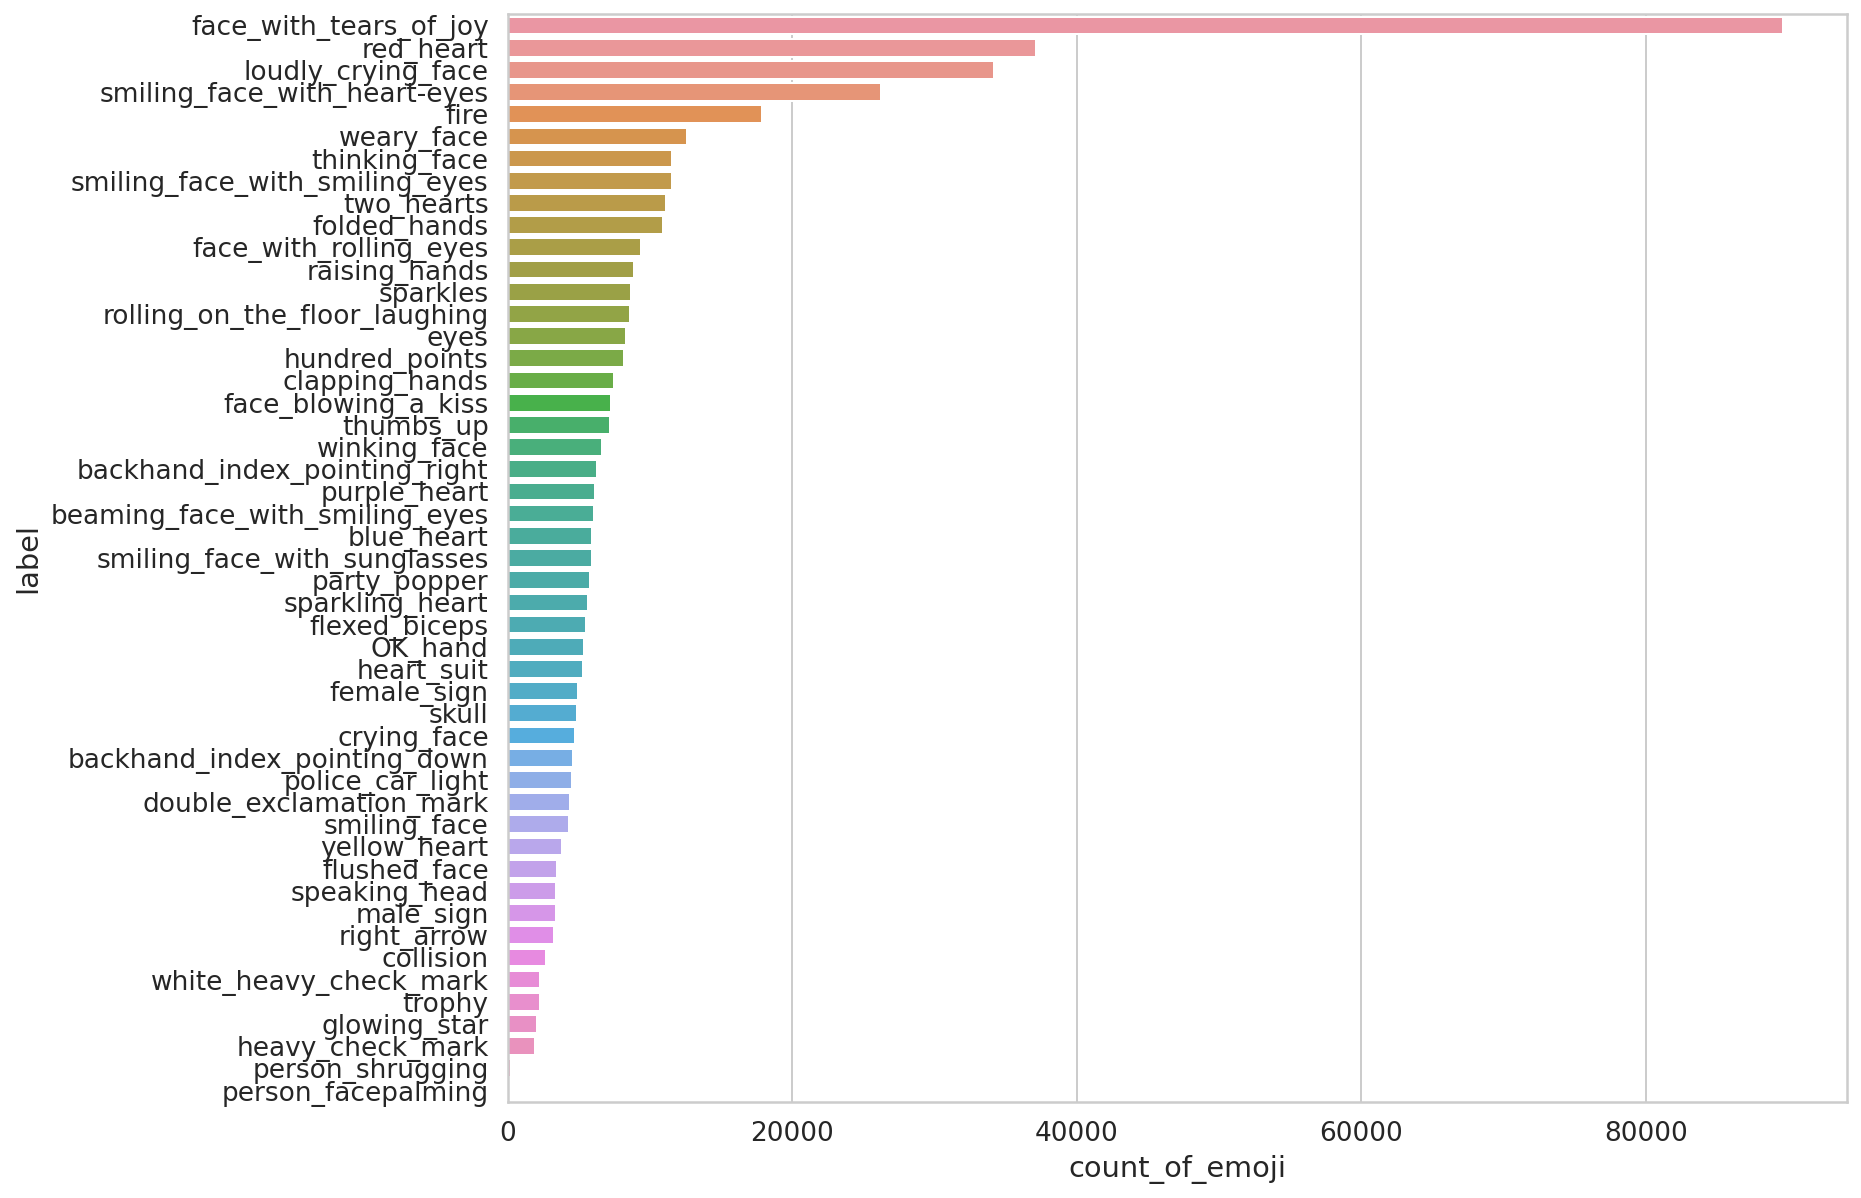

In [13]:
# Print out the count of each class (e.g., each emoji) in the dataset
order = df_multiclass_dataset['label'].value_counts(ascending=False).index
sns.countplot(y="label", data=df_multiclass_dataset, order=order)
plt.xlabel('count_of_emoji');

In [14]:
df_multiclass_dataset['label'].unique()

array(['face_with_tears_of_joy', 'purple_heart', 'party_popper',
       'sparkles', 'clapping_hands', 'fire', 'hundred_points',
       'red_heart', 'raising_hands', 'smiling_face_with_heart-eyes',
       'trophy', 'speaking_head', 'weary_face',
       'beaming_face_with_smiling_eyes', 'backhand_index_pointing_down',
       'two_hearts', 'heart_suit', 'male_sign', 'thumbs_up',
       'folded_hands', 'flexed_biceps', 'face_blowing_a_kiss',
       'smiling_face', 'face_with_rolling_eyes', 'crying_face',
       'police_car_light', 'OK_hand', 'blue_heart', 'flushed_face',
       'white_heavy_check_mark', 'female_sign', 'loudly_crying_face',
       'smiling_face_with_sunglasses', 'double_exclamation_mark',
       'smiling_face_with_smiling_eyes', 'thinking_face',
       'backhand_index_pointing_right', 'collision', 'winking_face',
       'rolling_on_the_floor_laughing', 'yellow_heart', 'sparkling_heart',
       'skull', 'eyes', 'glowing_star', 'heavy_check_mark', 'right_arrow',
       'perso

In [88]:
# emoji_class = ['face_with_tears_of_joy', 'purple_heart', 'party_popper',
#        'sparkles', 'clapping_hands', 'fire', 'hundred_points',
#        'red_heart', 'raising_hands', 'smiling_face_with_heart-eyes',
#        'trophy', 'speaking_head', 'weary_face',
#        'beaming_face_with_smiling_eyes', 'backhand_index_pointing_down',
#        'two_hearts', 'heart_suit', 'male_sign', 'thumbs_up',
#        'folded_hands', 'flexed_biceps', 'face_blowing_a_kiss',
#        'smiling_face', 'face_with_rolling_eyes', 'crying_face',
#        'police_car_light', 'OK_hand', 'blue_heart', 'flushed_face',
#        'white_heavy_check_mark', 'female_sign', 'loudly_crying_face',
#        'smiling_face_with_sunglasses', 'double_exclamation_mark',
#        'smiling_face_with_smiling_eyes', 'thinking_face',
#        'backhand_index_pointing_right', 'collision', 'winking_face',
#        'rolling_on_the_floor_laughing', 'yellow_heart', 'sparkling_heart',
#        'skull', 'eyes', 'glowing_star', 'heavy_check_mark', 'right_arrow',
#        'person_facepalming', 'person_shrugging']

# emoji_class = ['face_with_tears_of_joy',
#                'red_heart',
#                'loudly_crying_face',
#                'smiling_face_with_heart-eyes', 
#                'fire', 
#                'weary_face', 
#                'thinking_face', 
#                'folded_hands', 
#                'two_hearts', 
#                'smiling_face_with_smiling_eyes',
#                'sparkles', 
#                'raising_hands', 
#                'eyes', 
#                'face_with_rolling_eyes',
#                'hundred_points', 
#                'rolling_on_the_floor_laughing',
#                'clapping_hands', 
#                'thumbs_up', 
#                'face_blowing_a_kiss', 
#                'party_popper',
#               ]

# emoji_class = ['face_with_tears_of_joy',
#                'red_heart',
#                'loudly_crying_face',
# #                'smiling_face_with_heart-eyes', 
#                'fire', 
# #                'weary_face', 
#                'thinking_face', 
#                'folded_hands', 
# #                'two_hearts', 
#                'smiling_face_with_smiling_eyes',
#                'sparkles', 
#                'raising_hands', 
#                'eyes', 
# #                'face_with_rolling_eyes',
#                'hundred_points', 
#                'rolling_on_the_floor_laughing',
# #                'clapping_hands', 
#                'thumbs_up', 
#                'face_blowing_a_kiss', 
#                'party_popper',
#               ]
emoji_class = [### face expression
               'face_with_tears_of_joy', # positive  
               'crying_face', # negative 
               'weary_face', # negative  
               'thinking_face', # neutral  
               'face_with_rolling_eyes', # negative 
               'flushed_face', # neutral
               ### draw attention
               'party_popper', # positive
               'police_car_light', # negative 
               'hundred_points',  # positive
#                'trophy', # positive
               ### direct emotion response
               'two_hearts', # positive 
               'blue_heart', # positive
               ### sign
               # 'female_sign', # neutral 
               # 'male_sign', # neutral 
               ### hand gesture                   
               'thumbs_up', # positive
               'folded_hands', # positive 
               'flexed_biceps', # positive 
               'backhand_index_pointing_down', # negative 
              ]

print_distinct_emoji_in_dataset(emoji_class, displaywidth=5)

df_multiclass_sub_dataset = df_multiclass_dataset[df_multiclass_dataset['label'].isin(emoji_class)]

# SAMPLE_SIZE = 11000
# df_multiclass_dataset_balanced=df_multiclass_sub_dataset.groupby('label', as_index=False, group_keys=False)\
# .apply(lambda s: s.sample(SAMPLE_SIZE, replace=True))

# Samples equal size of each class with sample size as the size of the class with minimum number of data.
g = df_multiclass_sub_dataset.groupby('label', as_index=False, group_keys=False)

# df_multiclass_dataset_balanced_min = g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True))
print('   max:', g.size().max())
print('median:', int(g.size().median()))
print('   min:', g.size().min())

SAMPLE_SIZE=int(g.size().median())
# SAMPLE_SIZE=int(g.size().min())

df_multiclass_dataset_balanced = g.apply(
    lambda x: x.sample(min(SAMPLE_SIZE, x.index.size), replace=False, random_state=RANDOM_SEED).reset_index(drop=True))

# df_multiclass_dataset_balanced = df_multiclass_sub_dataset

print(df_multiclass_dataset_balanced['label'].value_counts())

Total distinct count of Emojis in dataset is : 15
😂 😢 😩 🤔 🙄 
😳 🎉 🚨 💯 💕 
💙 👍 🙏 💪 👇 

   max: 89657
median: 7199
   min: 3452
thinking_face                   7199
face_with_tears_of_joy          7199
folded_hands                    7199
face_with_rolling_eyes          7199
weary_face                      7199
hundred_points                  7199
thumbs_up                       7199
two_hearts                      7199
blue_heart                      5939
party_popper                    5779
flexed_biceps                   5519
crying_face                     4716
backhand_index_pointing_down    4569
police_car_light                4539
flushed_face                    3452
Name: label, dtype: int64


### Generate Text Embeddings and Label Categorical

#### Label Categorical

In [89]:
label_encoder = preprocessing.LabelEncoder()
df_multiclass_dataset_balanced['target'] = label_encoder.fit_transform(df_multiclass_dataset_balanced['label'])
df_multiclass_dataset_balanced.reset_index(inplace=True) # reset the index 
# rename the index to use name "id"
df_multiclass_dataset_balanced.index.rename('id', inplace=True) 
# drop the redundant index column and only use the "id" column
df_multiclass_dataset_balanced = df_multiclass_dataset_balanced.drop('index', 1)

emoji_class = list(label_encoder.classes_)

In [90]:
print(emoji_class)
df_multiclass_dataset_balanced.head()

['backhand_index_pointing_down', 'blue_heart', 'crying_face', 'face_with_rolling_eyes', 'face_with_tears_of_joy', 'flexed_biceps', 'flushed_face', 'folded_hands', 'hundred_points', 'party_popper', 'police_car_light', 'thinking_face', 'thumbs_up', 'two_hearts', 'weary_face']


,tweet,emoji,label,target
id,,,,
0,Weve got all the stats and talking points you need ahead of tomorrows game,[backhand_index_pointing_down],backhand_index_pointing_down,0
1,WE HAVE TO AT LEAST HAVE A 500K GAP FROM THEM YOU KNOW WHAT TO DO KEEP ON TWEETING AND VOTING RT AND REPLY,[backhand_index_pointing_down],backhand_index_pointing_down,0
2,Ill be live in Cyprus on the 24th of Feb 2018,[backhand_index_pointing_down],backhand_index_pointing_down,0
3,เฌอแตมมม See more for cher h,[backhand_index_pointing_down],backhand_index_pointing_down,0
4,Why must I laugh alone in human rights day,[backhand_index_pointing_down],backhand_index_pointing_down,0


In [91]:
df_train, df_test = train_test_split(df_multiclass_dataset_balanced, 
                                     test_size=0.1,
                                     random_state=RANDOM_SEED, 
                                     stratify=df_multiclass_dataset_balanced['label'])

x_train = df_train['tweet']
y_train = df_train['target']
# From category number to one-host representation.
y_train_category = to_categorical(y_train)

x_test = df_test['tweet']
y_test = df_test['target']
y_test_category = to_categorical(y_test)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(82894,) (82894,)
(9211,) (9211,)


In [92]:
count = 0
display_size = 5
print('Tweet texts:')
for i in x_train.head():
    print(i)

print('Category number:')
for i in y_train.head():
    print(i)

print('Catagory one-hot representation:')
for i in y_train_category:
    if count >= display_size:
        break
    count += 1
    print(i)

Tweet texts:
Good Morning My dear Comrades amp Lovelies Cuties How r chu all doing today so far
Shit Ill watch it rn good lookin
Happy Hope all my friends on the East Coast are bundled up and safe I
Do not let pundes near u
my kind of shooky sugakookie hihii
Category number:
13
11
1
3
3
Catagory one-hot representation:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


#### Text Embedding

In [93]:
def glove2dict(src_filename):
    """
    GloVe vectors file reader.

    Parameters
    ----------
    src_filename : str
        Full path to the GloVe file to be processed.

    Returns
    -------
    dict
        Mapping words to their GloVe vectors as `np.array`.

    """
    # This distribution has some words with spaces, so we have to
    # assume its dimensionality and parse out the lines specially:
    if '840B.300d' in src_filename:
        line_parser = lambda line: line.rsplit(" ", 300)
    else:
        line_parser = lambda line: line.strip().split()
    data = {}
    with open(src_filename, encoding='utf8') as f:
        while True:
            try:
                line = next(f)
                line = line_parser(line)
                data[line[0]] = np.array(line[1: ], dtype=np.float)
            except StopIteration:
                break
            except UnicodeDecodeError:
                pass
    return data


def zerovec(n=50):
    return np.array([0] * n)


def randvec(n=50, lower=-0.5, upper=0.5):
    """
    Returns a random vector of length `n`. `w` is ignored.

    """

    return np.array([random.uniform(lower, upper) for i in range(n)])

In [94]:
# USE_TWITTER_GLOVE = True

GLOVE_HOME = os.path.join('data')

glove_lookup = glove2dict(
    os.path.join(GLOVE_HOME, 'glove.6B.50d.txt'))

glove_lookup_twitter = glove2dict(
    os.path.join(GLOVE_HOME, 'glove.twitter.27B.50d.txt'))

In [95]:
glove_lookup.get('good', zerovec(n=50))

array([-3.5586e-01,  5.2130e-01, -6.1070e-01, -3.0131e-01,  9.4862e-01,
       -3.1539e-01, -5.9831e-01,  1.2188e-01, -3.1943e-02,  5.5695e-01,
       -1.0621e-01,  6.3399e-01, -4.7340e-01, -7.5895e-02,  3.8247e-01,
        8.1569e-02,  8.2214e-01,  2.2220e-01, -8.3764e-03, -7.6620e-01,
       -5.6253e-01,  6.1759e-01,  2.0292e-01, -4.8598e-02,  8.7815e-01,
       -1.6549e+00, -7.7418e-01,  1.5435e-01,  9.4823e-01, -3.9520e-01,
        3.7302e+00,  8.2855e-01, -1.4104e-01,  1.6395e-02,  2.1115e-01,
       -3.6085e-02, -1.5587e-01,  8.6583e-01,  2.6309e-01, -7.1015e-01,
       -3.6770e-02,  1.8282e-03, -1.7704e-01,  2.7032e-01,  1.1026e-01,
        1.4133e-01, -5.7322e-02,  2.7207e-01,  3.1305e-01,  9.2771e-01])

In [96]:
glove_lookup_twitter.get('good', zerovec(n=50))

array([ 0.6608  , -0.10159 ,  0.026775, -0.088053,  0.15578 ,  0.87288 ,
        1.29    ,  0.28934 , -0.59205 ,  0.26779 , -0.76604 ,  0.27955 ,
       -5.1483  , -0.056899, -0.050798, -0.083225,  0.48048 , -0.35409 ,
       -1.0566  ,  0.065436, -0.46674 ,  0.13847 , -0.22022 ,  0.61591 ,
        0.18462 ,  0.77965 ,  0.29022 , -0.24679 ,  0.95335 , -0.35699 ,
       -0.24246 ,  0.35939 , -0.16369 ,  0.30926 ,  0.32784 ,  0.66924 ,
       -0.028869,  0.13981 ,  0.12371 ,  0.96181 , -1.4018  , -0.19285 ,
        0.79053 ,  0.36647 ,  0.32751 ,  0.29666 , -0.039173, -0.14523 ,
       -0.19663 ,  0.026827])

In [97]:
glove_lookup.get('hello', zerovec(n=50))

array([-0.38497 ,  0.80092 ,  0.064106, -0.28355 , -0.026759, -0.34532 ,
       -0.64253 , -0.11729 , -0.33257 ,  0.55243 , -0.087813,  0.9035  ,
        0.47102 ,  0.56657 ,  0.6985  , -0.35229 , -0.86542 ,  0.90573 ,
        0.03576 , -0.071705, -0.12327 ,  0.54923 ,  0.47005 ,  0.35572 ,
        1.2611  , -0.67581 , -0.94983 ,  0.68666 ,  0.3871  , -1.3492  ,
        0.63512 ,  0.46416 , -0.48814 ,  0.83827 , -0.9246  , -0.33722 ,
        0.53741 , -1.0616  , -0.081403, -0.67111 ,  0.30923 , -0.3923  ,
       -0.55002 , -0.68827 ,  0.58049 , -0.11626 ,  0.013139, -0.57654 ,
        0.048833,  0.67204 ])

In [98]:
# Exploratory analysis to determine the max_len used for padding tokens 
token_lens = []
tknzr = TweetTokenizer(preserve_case=False)

for txt in df_multiclass_dataset_balanced.tweet:
#     tokens = txt.split()
    tokens = tknzr.tokenize(txt)
    token_lens.append(len(tokens))

print('Num of tweets:', len(token_lens))

Num of tweets: 92105


/anaconda/envs/py37_default/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


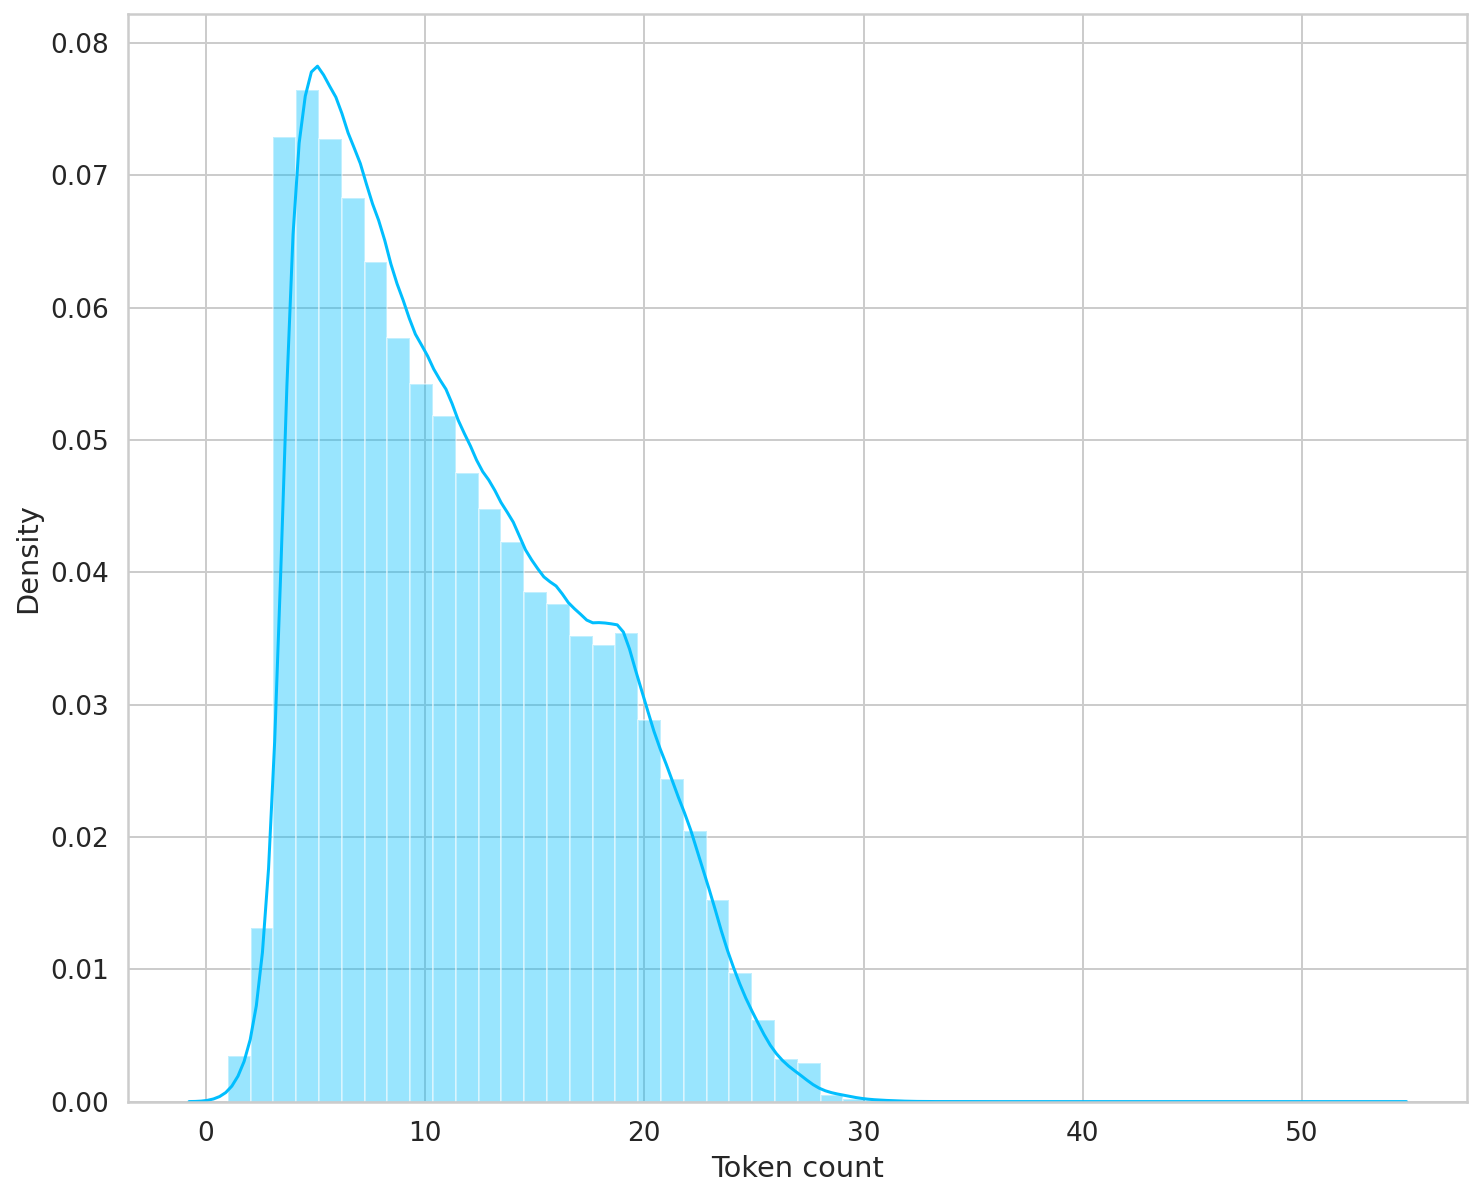

In [99]:
# Plots the token length distribution 
sns.distplot(token_lens)
plt.xlabel('Token count');

In [100]:
import random

# Set MAX_LEN used for padding tokens based on the exploratory analysis result 
MAX_LEN = 30
GLOVE_DIM = 50

tknzr = TweetTokenizer(preserve_case=False)

def get_tokens(txt, use_tweet_tokenizer=False):
    if use_tweet_tokenizer:
        return tknzr.tokenize(txt)
    return txt.split()

def get_embeddings(text_array, use_twitter_glove=True):
    embeddings = np.zeros((len(text_array), MAX_LEN, GLOVE_DIM))
    for i in range(len(text_array)):
        tokens = get_tokens(text_array[i], use_tweet_tokenizer=True)
        for j in range(min(len(tokens), MAX_LEN)):
            if use_twitter_glove:
                emb = glove_lookup_twitter.get(tokens[j].lower())
            else:
                emb = glove_lookup.get(tokens[j].lower())
            
            if emb is None:
                # print('Embedding not found for: ', tokens[j].lower())
                emb = randvec(n=GLOVE_DIM)
            embeddings[i][j] = emb
    return embeddings

In [101]:
tweets = ['We would like to wish everyone a very Happy New Year and all the best in 2018 htt',
          'ranks 6th in January Idol Group Brand Reputation 1Keep using 2Search GOT 7 on Naver htt']

for txt in tweets:
    print(get_tokens(txt))
    print(get_tokens(txt, use_tweet_tokenizer=True))

get_embeddings(tweets, use_twitter_glove=True)

['We', 'would', 'like', 'to', 'wish', 'everyone', 'a', 'very', 'Happy', 'New', 'Year', 'and', 'all', 'the', 'best', 'in', '2018', 'htt']
['we', 'would', 'like', 'to', 'wish', 'everyone', 'a', 'very', 'happy', 'new', 'year', 'and', 'all', 'the', 'best', 'in', '2018', 'htt']
['ranks', '6th', 'in', 'January', 'Idol', 'Group', 'Brand', 'Reputation', '1Keep', 'using', '2Search', 'GOT', '7', 'on', 'Naver', 'htt']
['ranks', '6th', 'in', 'january', 'idol', 'group', 'brand', 'reputation', '1keep', 'using', '2search', 'got', '7', 'on', 'naver', 'htt']


array([[[ 0.70057   ,  1.2429    ,  0.14358   , ...,  0.55525   ,
          0.32614   ,  0.030969  ],
        [ 0.14066   ,  0.54839   , -0.13823   , ..., -0.13877   ,
         -0.50944   , -0.38225   ],
        [-0.094661  ,  0.13413   ,  0.21436   , ...,  0.47062   ,
         -0.44501   ,  0.13283   ],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]],

       [[-0.25963   ,  0.17162   ,  0.80375   , ..., -0.28288   ,
         -0.30848   ,  1.3066    ],
        [ 0.19433073, -0.25494774,  0.36579141, ...,  0.36911541,
         -0.05007635, -0.05831262],
        [-0.0908    ,  0.24133   ,  0.79611   , ...,  0.14165   ,
         -0.17617   ,  0.34766   ],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  

In [102]:
x_train_emb = get_embeddings(x_train.array)
x_test_emb = get_embeddings(x_test.array)

In [103]:
print(x_train_emb.shape)
print(y_train_category.shape)
print(x_train_emb[0])
print(y_train_category[0])

print(x_test_emb.shape)
print(y_test_category.shape)

(82894, 30, 50)
(82894, 15)
[[ 0.6608   -0.10159   0.026775 ... -0.14523  -0.19663   0.026827]
 [ 0.68533   0.091213 -0.063856 ... -0.54849  -0.15294   0.70719 ]
 [-0.30138  -0.14016   0.10572  ... -0.26316   0.61673   0.42083 ]
 ...
 [ 0.        0.        0.       ...  0.        0.        0.      ]
 [ 0.        0.        0.       ...  0.        0.        0.      ]
 [ 0.        0.        0.       ...  0.        0.        0.      ]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
(9211, 30, 50)
(9211, 15)


### Imbalance Processing: SMOTE

In [104]:
ENABLE_SMOTE = False

if ENABLE_SMOTE:
    !pip install imbalanced-learn
    from imblearn.over_sampling import SMOTE

    print((x_train_emb.shape, y_train_category.shape))

    # Found array with dim 3. Estimator expected <= 2.
    # reshape two 2d and convert back later.
    x_train_emb_reshape = x_train_emb.reshape(-1, MAX_LEN * GLOVE_DIM)

    oversample = SMOTE()
    X, y = oversample.fit_resample(x_train_emb_reshape, y_train_category)

    # Convert back
    X = X.reshape(-1, MAX_LEN, GLOVE_DIM)

    print((X.shape, y.shape))

    x_train_emb, y_train_category = X, y

### Model Development LSTM

#### Model Training

In [57]:
from keras.models import Sequential 
from keras.layers import LSTM, Dense, Dropout, Bidirectional

In [134]:
# Model 1
model = Sequential()
model.add(Bidirectional(LSTM(units=512, return_sequences=True), input_shape=(MAX_LEN, GLOVE_DIM)))
model.add(Dropout(0.2))  # was 0.3
model.add(Bidirectional(LSTM(units=256)))
model.add(Dropout(0.2))  # was 0.3
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
# Multi-class classification, y has to be one-hot-encoded use keras.utils.to_categorical.
model.add(Dense(units=len(emoji_class), activation='softmax'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_8 (Bidirection (None, 30, 1024)          2306048   
_________________________________________________________________
dropout_7 (Dropout)          (None, 30, 1024)          0         
_________________________________________________________________
bidirectional_9 (Bidirection (None, 512)               2623488   
_________________________________________________________________
dense_28 (Dense)             (None, 64)                32832     
_________________________________________________________________
dense_29 (Dense)             (None, 15)                975       
Total params: 4,963,343
Trainable params: 4,963,343
Non-trainable params: 0
_________________________________________________________________


In [135]:
# Model 2
model = Sequential()
# model.add(Bidirectional(LSTM(units=512, return_sequences=True), input_shape=(MAX_LEN, GLOVE_DIM)))
# model.add(Dropout(0.2))  # was 0.3
model.add(Bidirectional(LSTM(units=256), input_shape=(MAX_LEN, GLOVE_DIM)))
# model.add(Dropout(0.2))  # was 0.3
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
# Multi-class classification, y has to be one-hot-encoded use keras.utils.to_categorical.
model.add(Dense(units=len(emoji_class), activation='softmax'))
model.summary()

# accuracy: 0.34
# macro f1: 0.33

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_10 (Bidirectio (None, 512)               628736    
_________________________________________________________________
dense_30 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_31 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_32 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_33 (Dense)             (None, 15)                495       
Total params: 705,231
Trainable params: 705,231
Non-trainable params: 0
_________________________________________________________________


In [136]:
# Model 3
model = Sequential()
# model.add(Bidirectional(LSTM(units=512, return_sequences=True), input_shape=(MAX_LEN, GLOVE_DIM)))
# model.add(Dropout(0.2))  # was 0.3
# model.add(Bidirectional(LSTM(units=256), input_shape=(MAX_LEN, GLOVE_DIM)))
model.add(LSTM(units=256, input_shape=(MAX_LEN, GLOVE_DIM)))
# model.add(Dropout(0.2))  # was 0.3
# model.add(Dense(units=128, activation='relu'))
# model.add(Dense(units=64, activation='relu'))
# model.add(Dense(units=32, activation='relu'))
# Multi-class classification, y has to be one-hot-encoded use keras.utils.to_categorical.
model.add(Dense(units=len(emoji_class), activation='softmax'))
model.summary()

# accuracy: 0.35
# macro f1: 0.34

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_13 (LSTM)               (None, 256)               314368    
_________________________________________________________________
dense_34 (Dense)             (None, 15)                3855      
Total params: 318,223
Trainable params: 318,223
Non-trainable params: 0
_________________________________________________________________


In [137]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics =['accuracy'])
# Keras detects the output_shape and automatically determines which accuracy to use when accuracy is specified.
# For multi-class classification, categorical_accuracy will be used internally.
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics =['categorical_accuracy'])


In [138]:
%%time

EPOCHS = 20
BATCH_SIZE = 64
BEST_MODEL_WEIGHT_FILE_PATH = 'lstm-best-model.hdf5'
# Early stopping if the loss is no longer decreasing for <patience> epochs.
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='min')
model_check_point_save = ModelCheckpoint(filepath=BEST_MODEL_WEIGHT_FILE_PATH, save_best_only=True, monitor='val_loss', mode='min')
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, epsilon=1e-4, mode='min')

hist = model.fit(x_train_emb, 
                 y_train_category, 
                 validation_split=0.1, 
                 shuffle=True, 
                 batch_size=BATCH_SIZE, 
                 epochs=EPOCHS,
                 callbacks=[early_stopping, model_check_point_save, reduce_lr_loss],
                )

Epoch 1/20
1166/1166 [==============================] - 12s 10ms/step - loss: 2.2922 - categorical_accuracy: 0.2336 - val_loss: 2.2074 - val_categorical_accuracy: 0.2773
Epoch 2/20
1166/1166 [==============================] - 12s 10ms/step - loss: 2.1492 - categorical_accuracy: 0.2898 - val_loss: 2.1320 - val_categorical_accuracy: 0.2976
Epoch 3/20
1166/1166 [==============================] - 11s 10ms/step - loss: 2.0854 - categorical_accuracy: 0.3133 - val_loss: 2.0800 - val_categorical_accuracy: 0.3128
Epoch 4/20
1166/1166 [==============================] - 11s 10ms/step - loss: 2.0313 - categorical_accuracy: 0.3331 - val_loss: 2.0707 - val_categorical_accuracy: 0.3217
Epoch 5/20
1166/1166 [==============================] - 12s 10ms/step - loss: 1.9850 - categorical_accuracy: 0.3480 - val_loss: 2.0426 - val_categorical_accuracy: 0.3311
Epoch 6/20
1166/1166 [==============================] - 11s 10ms/step - loss: 1.9374 - categorical_accuracy: 0.3630 - val_loss: 2.0443 - val_categoric

In [129]:
plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')

plt.title('Training history')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.ylim([0, 1]);

KeyError: 'accuracy'

### Model Evaluation

In [139]:
# Load the best weights, check scores, and predict values.
model.load_weights(filepath=BEST_MODEL_WEIGHT_FILE_PATH)

loss, accuracy = model.evaluate(x_test_emb, y_test_category)
print('    loss:', loss)
print('accuracy:', accuracy)

288/288 [==============================] - 1s 5ms/step - loss: 1.9967 - categorical_accuracy: 0.3502
    loss: 1.9967434406280518
accuracy: 0.35023340582847595


In [140]:
def get_predictions(model, dataset):
    tweets = dataset['tweet']
    # String of emoji class
    emoji_labels = dataset['label']
    embeddings = get_embeddings(tweets.array)
    preds = model.predict(embeddings)
#     print(preds)
#     print(np.sum(preds, axis=1))
#     return
    # Convert probability matrix to category number with max prodbablity.
    pred_catagories = np.argmax(preds, axis=1)
    pred_probs = preds.max(1)
    # Transform category number to emoji class string.
    pred_labels = label_encoder.inverse_transform(pred_catagories)
    
    return tweets, dataset['label'], dataset['target'], pred_labels, pred_catagories, pred_probs

tweets, emojis, category_num, pred_emojis, pred_category_num, pred_probs = get_predictions(model, df_test)

In [141]:
embeddings = get_embeddings(['the weather is great', 'good to know'])
preds = model.predict(embeddings)
print(preds)
print(sum(preds[0]))
print(sum(preds[1]))

[[0.02014706 0.06354156 0.02136399 0.12069224 0.04967032 0.10111067
  0.02514301 0.07157478 0.05124599 0.02072305 0.00354645 0.05168224
  0.26260877 0.05536382 0.08158605]
 [0.02599874 0.03817647 0.00918693 0.03141299 0.05569473 0.1147205
  0.01621264 0.0405394  0.036977   0.00665643 0.00206831 0.04579541
  0.5215315  0.03966219 0.01536677]]
0.99999999278225
1.0000000335276127


In [142]:
# precision, recall, f1-score, support.
print(classification_report(category_num, pred_category_num, target_names=list(emoji_class)))

                              precision    recall  f1-score   support

backhand_index_pointing_down       0.43      0.27      0.33       457
                  blue_heart       0.23      0.16      0.19       594
                 crying_face       0.34      0.20      0.25       471
      face_with_rolling_eyes       0.28      0.30      0.29       720
      face_with_tears_of_joy       0.28      0.22      0.24       720
               flexed_biceps       0.32      0.26      0.29       552
                flushed_face       0.21      0.07      0.10       345
                folded_hands       0.44      0.44      0.44       720
              hundred_points       0.43      0.44      0.44       720
                party_popper       0.55      0.65      0.59       578
            police_car_light       0.46      0.59      0.52       454
               thinking_face       0.36      0.45      0.40       720
                   thumbs_up       0.28      0.38      0.32       720
                  t

In [143]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(15, 12))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
#         plt.xticks(tick_marks, target_names, rotation=45)
        plt.xticks(tick_marks, target_names, rotation=90)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

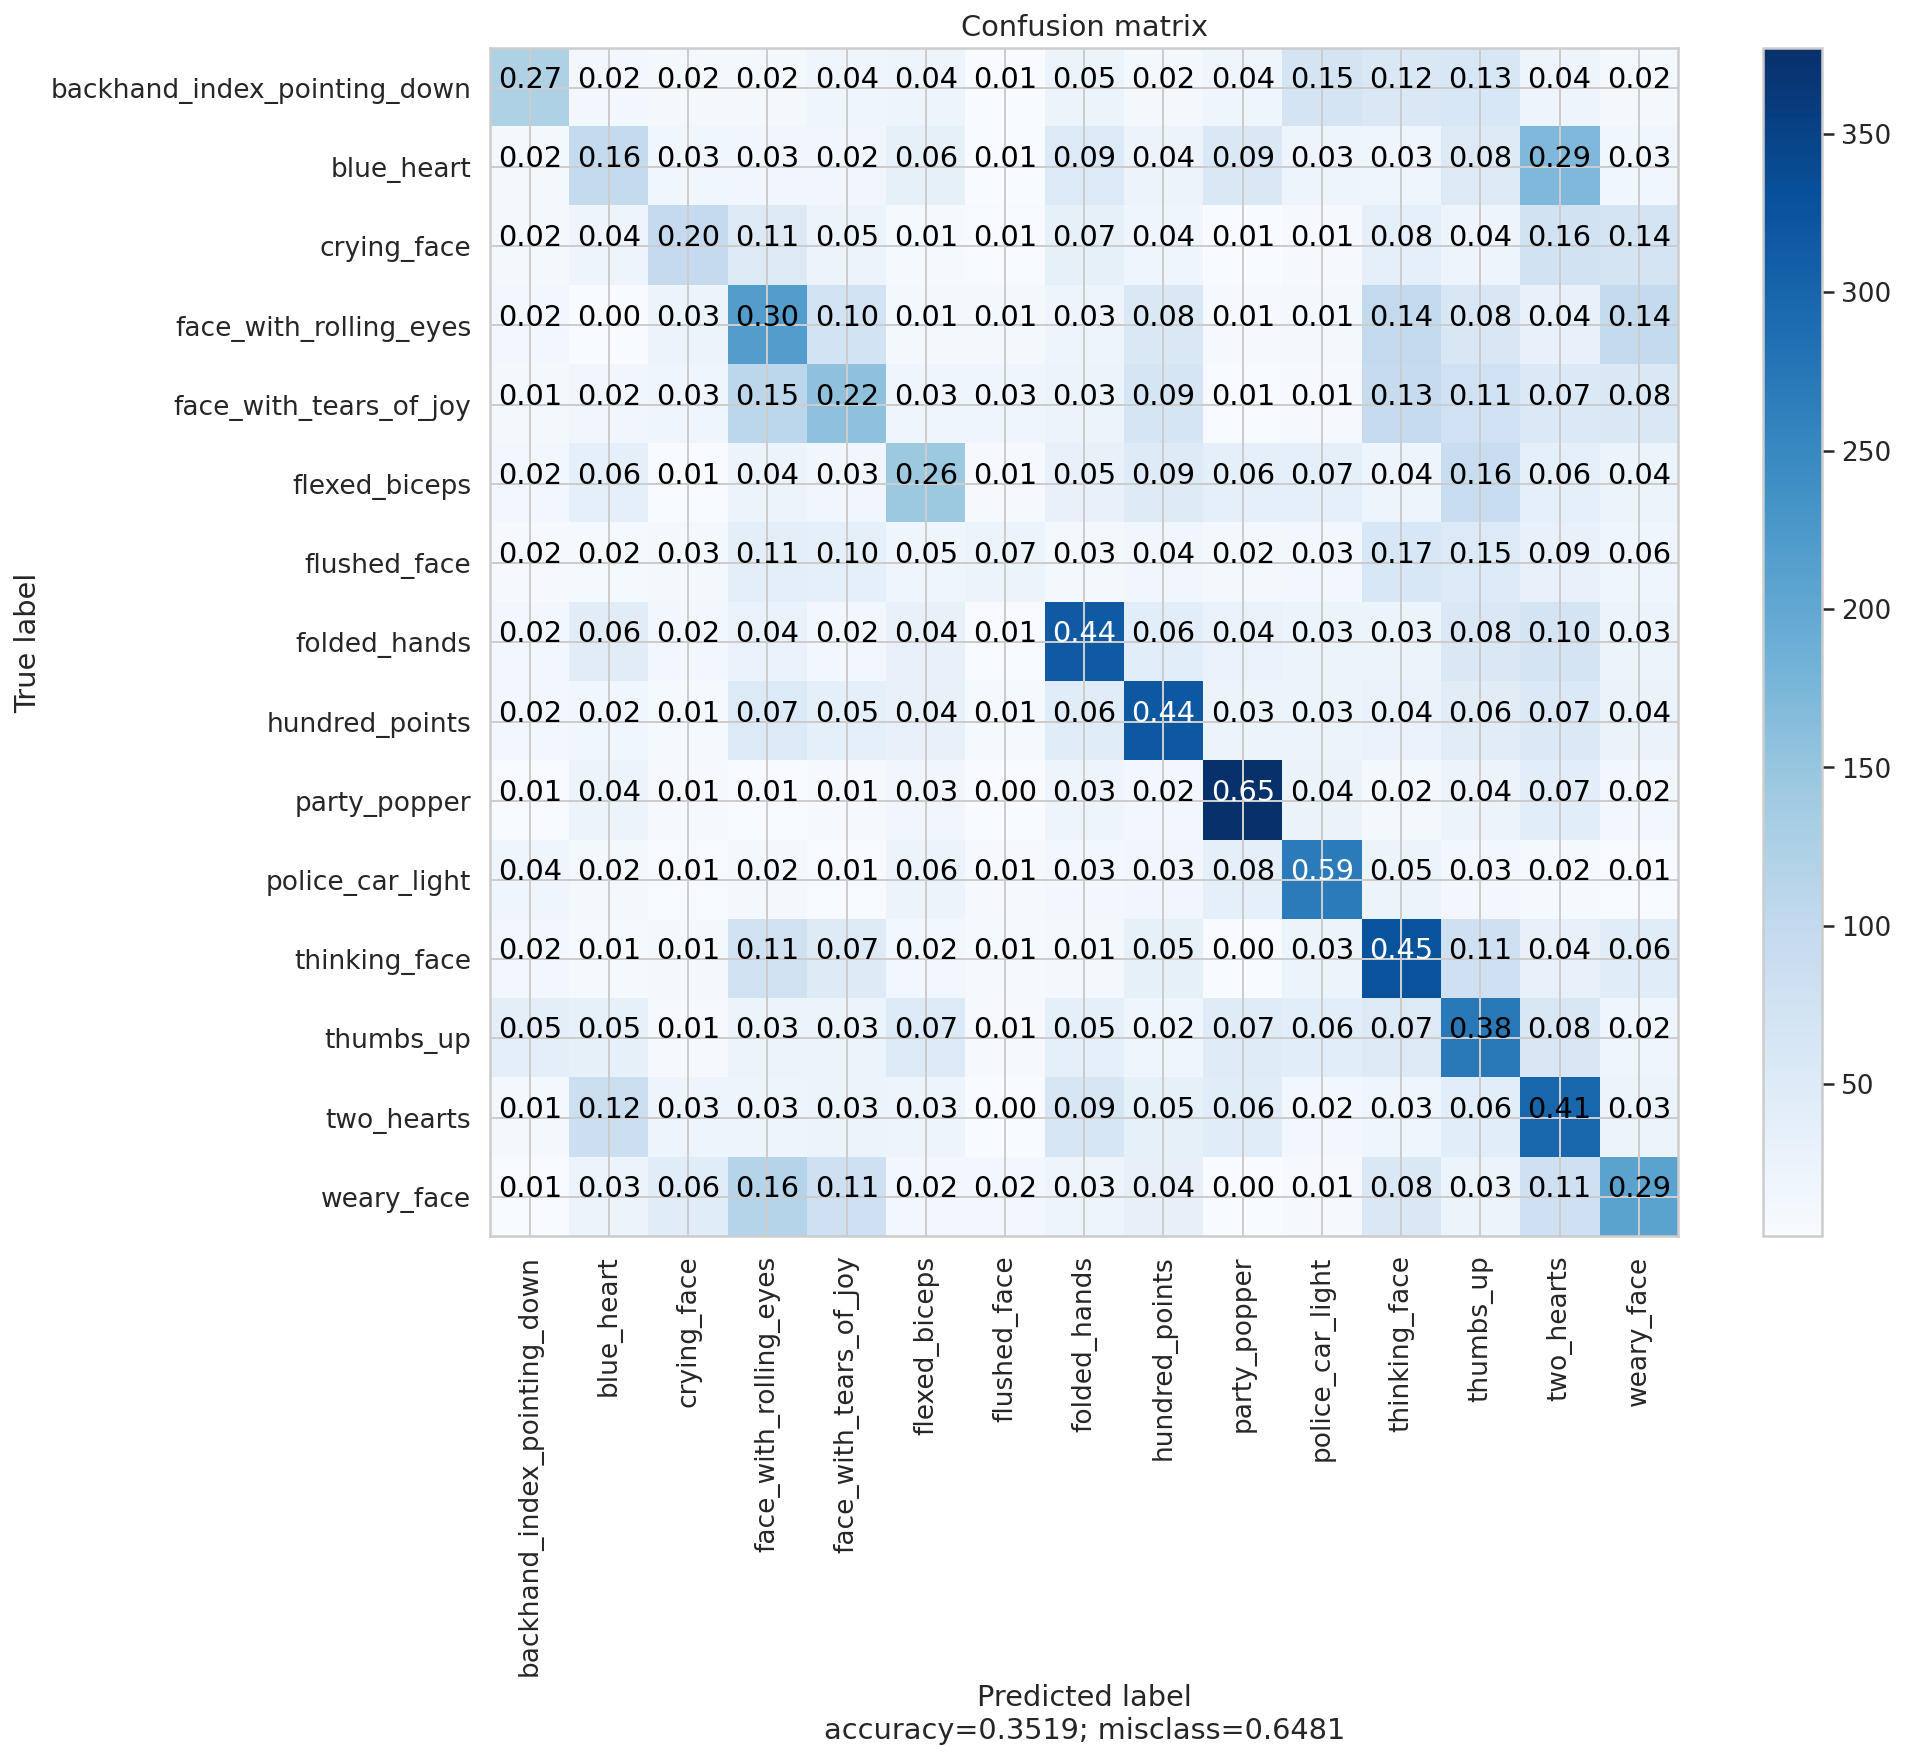

In [144]:
# from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn

conf_matrix = confusion_matrix(y_true=category_num, y_pred=pred_category_num)

plot_confusion_matrix(conf_matrix, target_names=list(emoji_class))

In [145]:
df_prediction = pd.DataFrame(
    {'tweet_texts': tweets,
     'emojis': emojis,
     'predicted_emojis': pred_emojis,
     'predicted_probability': pred_probs,
    })

In [146]:
df_prediction['emojis'] = [emoji.emojize(':'+ e +':') for e in df_prediction['emojis'].values]
df_prediction['predicted_emojis'] = [emoji.emojize(':'+ e +':') for e in df_prediction['predicted_emojis'].values]

In [147]:
df_prediction.head(20)

,tweet_texts,emojis,predicted_emojis,predicted_probability
id,,,,
53450,Toy boy place is available Details soon on,🎉,💕,0.233943
77641,Thanks mate all the best for the play offs,👍,👍,0.666428
62007,Updated 2903 9PM KST Melon 4 Genie 3 Naver Bugs OUT Mnet 1 Soribada,🚨,🚨,0.899196
50425,i dont Fw nobody i just be doing me Fr,💯,💯,0.638595
33102,Phew Enjoy the sir Cracking job done,💪,👍,0.784625
62859,so much foreign money into RNC and trump and GOP campaigns,🚨,🤔,0.300839
76691,It was a BBC programme Thats probably why its so good,👍,👍,0.317986
7672,Always and I live here too lol,💙,😂,0.378663
61842,MOCK DRAFT MONDAY See who the experts are favoring at pick 6,🚨,🚨,0.267160
